# Homework 11 #
## by Robin James ##

In [406]:
import numpy as np
import matplotlib.pyplot as plt

#Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

rng = np.random.default_rng()

# Problem 1 #
## Part i ##
$$ p(y) = \frac{N}{y},y \in[1,a] $$
Find N
$$ p(y)dy = \frac{N}{y}dy $$
$$ 1 = \int_1^a\frac{N}{y}dy $$
$$1=Nln|a| $$
$$ N= \frac{1}{ln|a|} $$
Mapping [0,1) to function
$$ x= \frac{1}{ln|a|} \int_1^y \frac1ydy $$

$$ y= a^x $$

(array([1563., 1327., 1208., 1091.,  975.,  874.,  861.,  764.,  673.,
         664.]),
 array([1.00007167, 1.17186698, 1.3436623 , 1.51545762, 1.68725294,
        1.85904826, 2.03084358, 2.20263889, 2.37443421, 2.54622953,
        2.71802485]),
 [<matplotlib.patches.Polygon at 0x1f70f94ab50>])

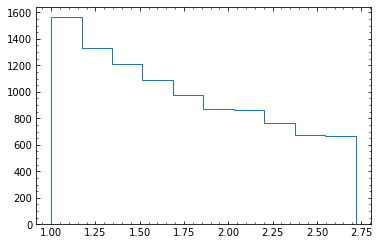

In [407]:
## test
x=rng.random(size=[10000])
r=np.exp(x)
plt.hist(r,histtype="step")

## Part ii ##
Find N
$$ p(y) dy = \frac{N}{y^2}dy $$
$$ 1 = \int^N_1 \frac{N}{y^2}dy $$
$$ N = \frac{1}{1-\frac{1}{a}} $$
Mapping [0,1) to function
$$ x= \frac{1}{1-\frac{1}{a}} \int^{y}_1 \frac{1}{y^2} $$
$$ x= \frac{1}{1-\frac{1}{a}} (1-\frac{1}{y})$$
$$ y=\frac{1}{-x+x/a+1} $$

C:\Users\ROBINJ~1\AppData\Local\Temp/ipykernel_19560/611121118.py:8: RuntimeWarning: overflow encountered in exp
  np.exp(r)


array([1.97132896e+04, 2.57455125e+01, 8.29624384e+00, ...,
       6.98308876e+14, 1.57798638e+01, 1.67122681e+01])

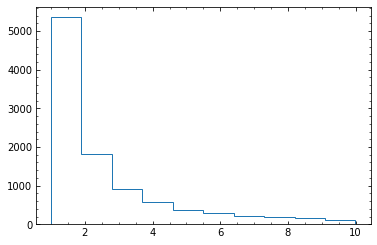

In [408]:
def g(x, a=2):
    return 1/(-x+x/a+1)


x=rng.random(size=[10000])
plt.hist(g(x,10),histtype="step")
r=1/(np.log(2)*x)
np.exp(r)


# Problem 2 #
Given three independent random numbers, $x_1$,$x_2$,$x_3$, it is known that
$$ x_1 = \rho \cos\theta \sin \phi $$
$$ x_2= \rho \sin \theta \sin \phi $$
$$ x_3= \rho \cos \phi $$
or $$ \rho= \sqrt{x_1^2+x_2^2+x_3^2} $$
$$ \theta= \arccos(x_3/\rho) $$
$$ \phi =\arctan(x_2/x_1) $$
This is good, but before doing the transformation we need to normalize the points, so they all fall in side of the sphere.
If we get another uniform random number, u, and divide each coordinate by $ \rho$ and multiply the cube root of u, we then can apply the polar transformation to get a random point in the unit sphere. The cubic come from the inverse of the volume of a sphere.


In [409]:
def getrandomspherepoint(N):
    u=rng.random(size=N)
    x=rng.uniform(-1,1,size=(3,N))

    x=x/np.linalg.norm(x,axis=0)

    x=x*np.cbrt(u)

    rho=np.linalg.norm(x,axis=0)

    theta = np.arccos(x[2,:],rho) * 180 / np.pi
    phi = np.arctan2(x[1,:],x[0,:]) * 180 / np.pi
    rho=np.linalg.norm(x,axis=0)
    return (rho,theta,phi)

(array([  1537.,   8149.,  20677.,  39109.,  62548.,  92095., 126928.,
        168101., 214154., 266702.]),
 array([0.01724159, 0.11551742, 0.21379325, 0.31206908, 0.4103449 ,
        0.50862073, 0.60689656, 0.70517239, 0.80344821, 0.90172404,
        0.99999987]),
 [<matplotlib.patches.Polygon at 0x1f70fafd2b0>])

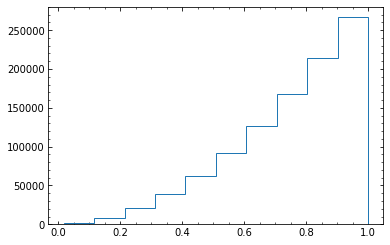

In [410]:
N=1000000
rpolar=getrandomspherepoint(N)
plt.hist(rpolar[0],histtype="step")




(array([  1429.,  17908.,  88122., 191619., 193453., 190196., 196235.,
         98494.,  20631.,   1913.]),
 array([  2.30954248,  19.70409815,  37.09865382,  54.49320949,
         71.88776517,  89.28232084, 106.67687651, 124.07143218,
        141.46598785, 158.86054352, 176.25509919]),
 [<matplotlib.patches.Polygon at 0x1f70fbb8160>])

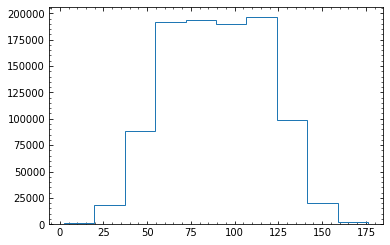

In [411]:
plt.hist(rpolar[1],histtype="step",)

(array([ 90818., 118795.,  80840., 118630.,  90943.,  90768., 118659.,
         81479., 118585.,  90483.]),
 array([-1.79999391e+02, -1.43999521e+02, -1.07999652e+02, -7.19997831e+01,
        -3.59999139e+01, -4.47829353e-05,  3.59998244e+01,  7.19996935e+01,
         1.07999563e+02,  1.43999432e+02,  1.79999301e+02]),
 [<matplotlib.patches.Polygon at 0x1f70fcbc730>])

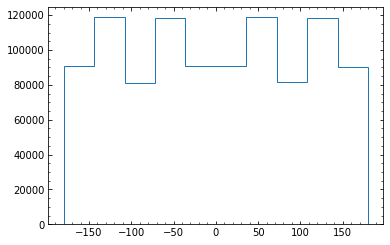

In [412]:
plt.hist(rpolar[2],histtype="step")